<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerGA.jpg" alt="Drawing" style="width:1000px;">



# <center> **14. Genetic Algorithms (GAs)**  </center>

## **Outline**
1. **GAs: Introduction on computation**
2. **GAs: The Traveling Salesman Problem**
3. **GAs: Crossover, mutation, selection and reduction**
4. **GAs: Assembling and analysing examples**

In [1]:
#@title **Execute this cell**
#@markdown Please include your student id
import sys
import inspect

group_id = "IA1-20252-C1" #@param {type:"string"}
assignment_id = group_id +'.genetic_alg'
student_id = "2211233" #@param {type:"string"}
"""
Put your student ID here

Example: student_id =  '2152145'
"""

"\nPut your student ID here\n\nExample: student_id =  '2152145'\n"

In [2]:
#@title **Execute this cell**
#@markdown **UTILS**
#@markdown Please dont modify any line in this cell

import os
import json
import requests
from collections import namedtuple


Config = namedtuple('Config', ['server_name'])
config = Config(server_name='https://bivlabgrader.azurewebsites.net/api')


def check_solution_and_evaluate(assignment_id: str, student_func_str: str):

    # Set the endpoint and payload.
    payload = {
        'func_str': student_func_str,
        'assignment_id': assignment_id,
        'student_id': student_id
    }
    endpoint_url = config.server_name + '/CheckAndEvaluateSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.post(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def pprint_json_response(response, indent=0):
    """Pretty print the response."""
    for key, value in response.items():
        print('\t' * indent + str(key.capitalize()))

        # If dictionary, do a recurrent call.
        if isinstance(value, dict):
            pprint_json_response(value, indent + 1)
        else:
            # Enumerate elements if list.
            if isinstance(value, list):
                if len(value) == 1:
                    print('\t' * (indent + 1) + str(value[0]))
                else:
                    for i, e in enumerate(value, start=1):
                        print('\t' * (indent + 1) + f'{i}. {e}')
            else:
                print('\t' * (indent + 1) + str(value))

In [3]:
#@title 1. MONTAR EL DRIVE { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/ai-uis-student-master')
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/ai-uis-student-master


In [4]:
#@title 2. LOAD LIB { display-mode: "form" }
import numpy as np
import matplotlib.pyplot as plt


# **1. GAs: introduction on computation**

### **From Biology**

Bioinspired in biological concepts and its genetic-molecular base of knowledge. The following assumption could be considered:

- Individuals who are more successful in surviving and attracting peers are more likely to generate a large number of descendants.
- The genes of the best adapted individuals will spread in successive generations.
- The combination of some good features coming from different ancestors, can sometimes produce "super-individuals" descendants


###  **On Computation**

We work with a population of individuals and each individual represents **a solution** to a particular problem.

- To each individual is assigned an score related with adaptation level (successful in surviving and attracting peers)
    - A major probability of reproducing and crossing genetic material
    - The crossing produces individuals who share characteristics of their parents (heritage).
    
- The crossover generates a new population, which has best features than ancestor populations.
- The population will converge towards an optimal solution

##### Keywords
**selection, crossover, mutation, reduction**


# **2. GAs: The Traveling Salesman Problem**

We are dealing with NP problems (Non-deterministic search, polinomial check), in which an exhaustive search is  **impossible**.

The **TSP problem (Travelling Sales Person)**

El problema TSP (Travelling Sales Person) try to find a shorter route that passes through all the cities of a given set.


Refs:

- GA Tutorial [here](http://www.obitko.com/tutorials/genetic-algorithms/index.php)
- Compendium of NP Optimization Problems [here](http://www.csc.kth.se/~viggo/problemlist/)    
    

### **Go to  simulate TSP problem:**

- Firstly, we go to generate a set of city locations.

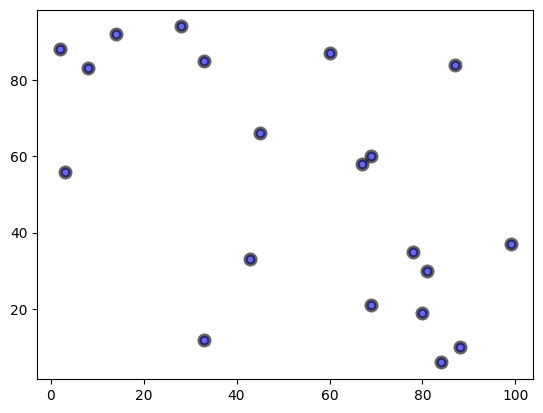

In [ ]:
#@title **code** To produce city locations
w_size = 100
n_cities = 20
#cities = (np.random.random((n_cities,2))*w_size).astype(int) #<- this is random line
cities = np.array([[ 2,88],[87,84],[84,6],[99,37], [60, 87], [ 8, 83], [43, 33], [45, 66], [28, 94], [ 3, 56], [14, 92], [88, 10], [33, 12], [33, 85], [69, 60], [67, 58], [80, 19], [81, 30], [69, 21], [78, 35]])

plt.scatter(cities[:,0], cities[:,1],s=50, c= "blue", alpha=0.6, edgecolors="black", linewidths=3 )
#print( cities)

In [ ]:
x = np.arange(10)
y = np.roll(x, 1)
print(x)
print(y)

[0 1 2 3 4 5 6 7 8 9]
[9 0 1 2 3 4 5 6 7 8]


In [ ]:
def TSP_plot_solution(cities, solution):
    plt.plot(cities[:,0], cities[:,1], 'o', markersize=7, c="blue", alpha=0.6, markeredgecolor="black", markeredgewidth=3) # Use plot with markers for all cities
    plt.plot(cities[solution,0].tolist()+[cities[solution[0],0]], cities[solution,1].tolist()+[cities[solution[0],1]])
    plt.plot(cities[solution[0],0], cities[solution[0],1], marker="x", markersize=10, c="red", lw="5") # Use plot with marker for starting city
    plt.plot(cities[solution[-1],0], cities[solution[-1],1], marker="x", markersize=10, c="yellow", lw="5") # Use plot with marker for starting city
    plt.title("cost %.3f"%(TSP_cost(cities, solution)))


def TSP_cost(cities, solution):
    sol_cities = cities[solution]
    return np.sum(np.sqrt(np.sum((sol_cities - np.roll(sol_cities,-1, axis=0))**2, axis=1)))
    #en sum si el axis=0 suma por columnas en vertical y si axis=1 suma por filas horizontalmente

In [ ]:
np.roll?

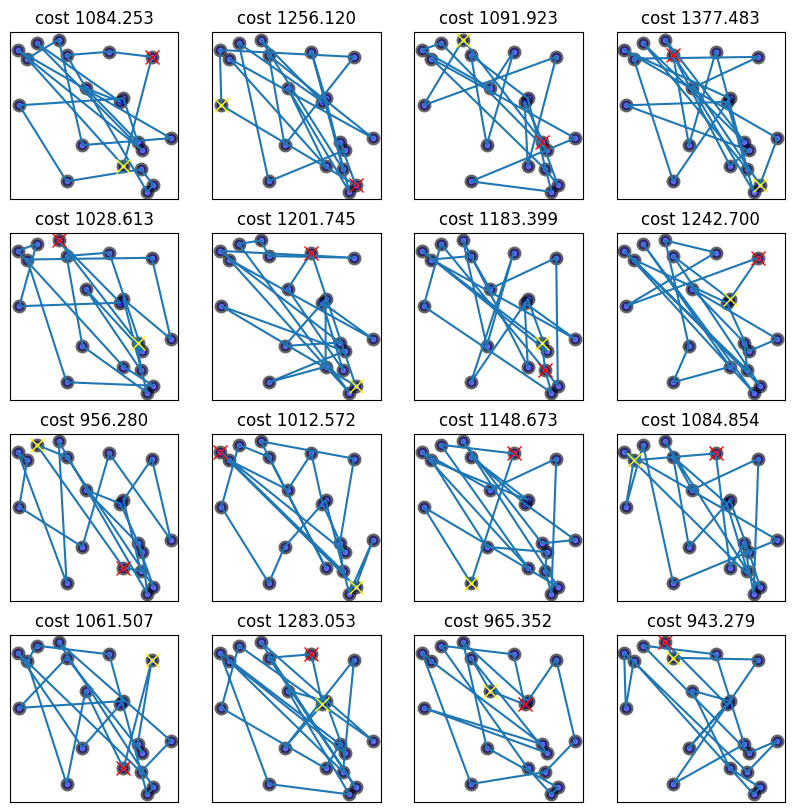

In [ ]:
#@title **code:** To plot solutions with associated cost
np.random.permutation(n_cities)
fig = plt.figure(figsize=(10,10))
for i in range(16):
    ax = fig.add_subplot(4,4,i+1)
    one_solution = np.random.permutation(n_cities)
    TSP_plot_solution(cities, one_solution)
    ax.set_xticks([])
    ax.set_yticks([])

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- What about random line:
    `cities = (np.random.random((n_cities,2))*w_size).astype(int)`
- Which kind of metric uses the function: ` TSP_cost(cities, solution)`
- Which means: `cities[solution,0].tolist()+[cities[solution[0],0]]`

In [ ]:
#@title **code** more about cost computation
one_s = np.random.permutation(n_cities)
#print(one_s)
#print( cities[one_s])
#print(cities[one_s,0].tolist())

#print( cities[one_s,0].tolist()+[cities[one_s[0],0]])
#print( cities[one_s,1].tolist()+[cities[one_s[0],1]])
print("one_s", one_s)
print("rol_s", np.roll(one_s,-1, axis=0))

#print(one_s - np.roll(one_s,-1, axis=0))


one_s [14 13  9 10  1  7  5  3 15  4 17  8 16 12  0  6 11  2 19 18]
rol_s [13  9 10  1  7  5  3 15  4 17  8 16 12  0  6 11  2 19 18 14]


# **3. GAs:crossover, mutation, selection and reduction**


### **GAs structure: from biological concepts to computational terms.**


- Each **solution** is represented by a set of parameters named: **"genes"**

- Each group of **genes** represents a solution named **chromosome**. In general is can be denominated **fenotype**
- The **adaptation function** assigns a value to a particular **chromosome** that represent a level of adaptation.
- During **Reproduction** is selected the parents and their **chromosome** are combined using operations of **crossover** and **mutation**
    - Well-adapted organisms can be chosen several times
    
**GO to the action!**    

## **3.1 To randomly start the population**

In [5]:
#@title **code** To start the population
def TSP_initialize_population(n_individuals, n_cities):
    r = []
    for i in range(n_individuals):
        r.append(np.random.permutation(n_cities))
    return np.array(r)
TSP_initialize_population(100, n_cities).shape

NameError: name 'n_cities' is not defined

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- What are we doing here?
- Which is the output

## **3.2 The crossover operator**

From two selected parents, the chromosome are split on random positions to produce one, two or several new chromosomes

In [6]:
#@title **code** A crossover function example
def TSP_cross_over(solution1, solution2):
    l = len(solution1)
    cstart = np.random.randint(l)
    cend   = np.random.randint(l-cstart)+cstart+1
    r = np.zeros(l)
    s1part = solution1[cstart:cend]
    r[cstart:cend] = s1part
    c = 0
    for i in range(l):
        c = cend if c==cstart else c
        if not solution2[i] in s1part:
            r[c]=solution2[i]
            c += 1

    return r


In [ ]:
#@title **code** Example of crossover
papi = np.random.permutation(n_cities)
mami = np.random.permutation(n_cities)
hijo = TSP_cross_over(papi, mami)
print ("papi: ", papi)
print ("mami: ", mami)
print ("hijo: ", hijo.astype(int))

papi:  [14  6 17 12 15  2  5  7 11 16  3 13  0  4 10 19 18  1  8  9]
mami:  [19 16  4  5  6 13  3 17  8  2  0 12 15  1 14 10  7 18  9 11]
hijo:  [16  4  5  6 13  3 17  8  2  0 12 15  1 14 10 19  7 18  9 11]


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- What are we doing here?
- How many chromosomes return this kind of crossover?

## **3.3 The mutation operator**
It is applied to each children which randomly alter each *gene* of chromosome. Such change is namely performed with a low probability, so, change a little!

In [ ]:
#@title **An function for mutation**
def TSP_mutate(solution, mutation_prob):
    mutated_solution = np.copy(solution)
    for i in range(len(solution)):
        if np.random.random()<mutation_prob:
            j = i+1 if i!=len(solution)-1 else 0
            tmp = mutated_solution[i]
            mutated_solution[i] = mutated_solution[j]
            mutated_solution[j] = tmp
    return mutated_solution

In [ ]:
#@title **An example for mutation**
hijo= hijo.astype(int)
print( hijo)
print( TSP_mutate(hijo, 0.9))

[16  4  5  6 13  3 17  8  2  0 12 15  1 14 10 19  7 18  9 11]
[16  5  6 13  3 17  8  2  0 12 15  1 14 10 19  7 18  9 11  4]


In [ ]:
#@title **A plot function**
def TSP_plot_GA_result(best, bests, means, stds):
    fig = plt.figure(figsize=(12,4))
    fig.add_subplot(121)
    plot_evolution(bests, means, stds)
    fig.add_subplot(122)
    TSP_plot_solution(cities, best)

# **4. GAs: Assembling and analysing examples**

### Genaral Genetic algorithm

In [ ]:
#@title  **code** GAs implementation
%%writefile code/ga.py
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

def plot_evolution(bests, means, stds):
    plt.plot(means, label="means")
    plt.plot(bests, label="bests")
    plt.fill_between(range(len(means)), means-stds, means+stds, color="yellow", alpha=0.2)
    plt.legend()


def run_ga(pop_size, init_population_function,
           mutation_function, crossover_function, cost_function,
           crossover_prob, mutation_prob, n_iters):

    pop = init_population_function(pop_size)
    n_xover_indivs = int(pop_size * crossover_prob)

    means = []
    stds  = []
    best_costs = []
    best = None

    for i in tqdm(range(n_iters)):

        #if i%(n_iters/10)==0:
        # print i

        # do cross over
        offsprings = []
        permut_temp = np.random.permutation(len(pop))
        idx_xover_indivs = permut_temp[n_xover_indivs:]
        #print "permut_temp: ", permut_temp
        #print "idx_xover_indivs: ", idx_xover_indivs
        for idx in idx_xover_indivs:
            idx_counterpart = np.random.randint(len(pop))
            i1 = pop[idx]
            i2 = pop[idx_counterpart]
            offs = crossover_function(i1,i2)
            offsprings.append(offs)
        offsprings = np.array(offsprings)

        pop = np.vstack((pop, offsprings)).astype(int)

        # mutate population
        for j in range(len(pop)):
            pop[j] = mutation_function(pop[j], mutation_prob)

        # select best to maintain pop_size fixed
        costs = np.array([cost_function(j) for j in pop])
        top_idxs  = np.argsort(costs)[:pop_size]
        pop = pop[top_idxs]

        costs = costs[top_idxs]

        means.append(np.mean(costs))
        stds.append(np.std(costs))
        best_costs.append(np.min(costs))

        if best is None or np.min(costs) < cost_function(best):
             best = pop[np.argmin(costs)]

    means      = np.array(means)
    stds       = np.array(stds)
    best_costs = np.array(best_costs)


    return best, best_costs, means, stds


Overwriting code/ga.py


  0%|          | 0/200 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

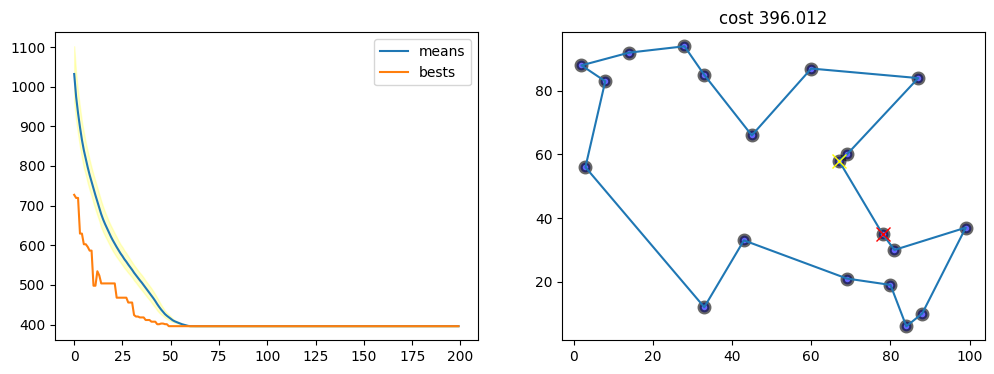

In [ ]:
#@title **code** Running a solution
%run code/ga.py

r =  run_ga(pop_size=1000,
               init_population_function = lambda x: TSP_initialize_population(x, n_cities),
               mutation_function        = TSP_mutate,
               crossover_function       = TSP_cross_over,
               cost_function            = lambda x: TSP_cost(cities, x),
               crossover_prob           = 0.001,
               mutation_prob            = 0.001,
               n_iters                  = 200)

best, best_costs, means, stds = r
TSP_plot_GA_result(best, best_costs, means, stds)

Con una probabilidad de mutación muy pequeña

  0%|          | 0/200 [00:00<?, ?it/s]

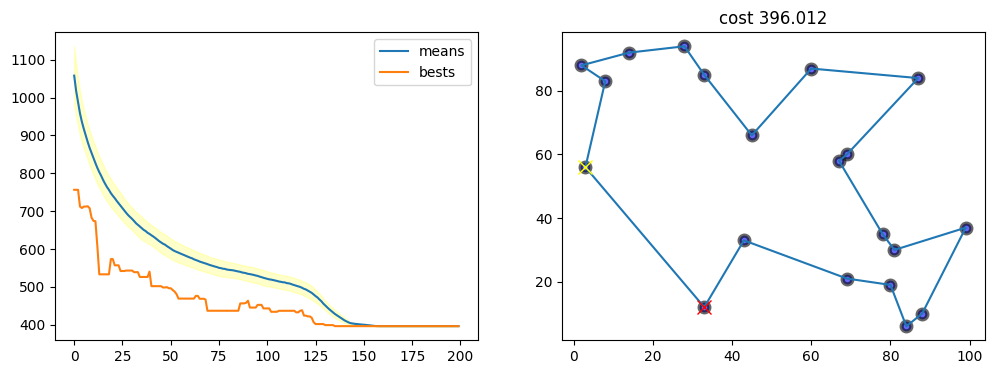

In [ ]:
#@title **code** Other configuration
r =  run_ga(pop_size=1000,
               init_population_function = lambda x: TSP_initialize_population(x, n_cities),
               mutation_function        = TSP_mutate,
               crossover_function       = TSP_cross_over,
               cost_function            = lambda x: TSP_cost(cities, x),
               crossover_prob           = 0.5,
               mutation_prob            = 0.01,
               n_iters                  = 200)

best, best_costs, means, stds = r
TSP_plot_GA_result(best, best_costs, means, stds)

Con una probabilidad de cruce muy pequeña

  0%|          | 0/200 [00:00<?, ?it/s]

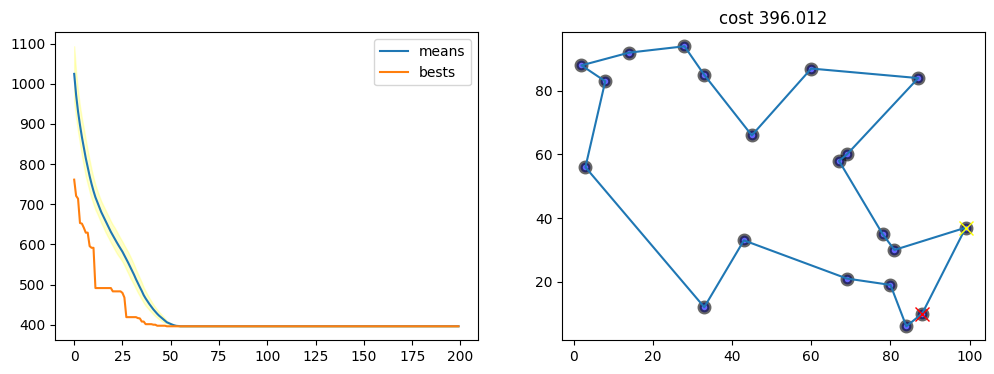

In [ ]:
#@title **code** Other configuration
r =  run_ga(pop_size=1000,
               init_population_function = lambda x: TSP_initialize_population(x, n_cities),
               mutation_function        = TSP_mutate,
               crossover_function       = TSP_cross_over,
               cost_function            = lambda x: TSP_cost(cities, x),
               crossover_prob           = 0.01,
               mutation_prob            = 0.001,
               n_iters                  = 200)

best, best_costs, means, stds = r
TSP_plot_GA_result(best, best_costs, means, stds)

Con una probabilidad de mutación muy alta

  0%|          | 0/200 [00:00<?, ?it/s]

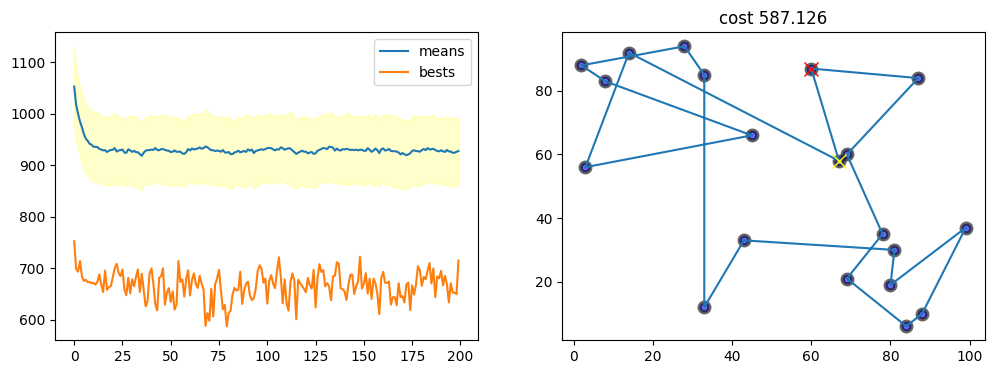

In [ ]:
#@title **code** Other configuration
r =  run_ga(pop_size=1000,
               init_population_function = lambda x: TSP_initialize_population(x, n_cities),
               mutation_function        = TSP_mutate,
               crossover_function       = TSP_cross_over,
               cost_function            = lambda x: TSP_cost(cities, x),
               crossover_prob           = 0.5,
               mutation_prob            = 0.9,
               n_iters                  = 200)

best, best_costs, means, stds = r
TSP_plot_GA_result(best, best_costs, means, stds)

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Change the crossover function usign next the following logic:
<img src='https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/ga_1.png' style="width:450px;">

- recibe dos padres
- retorna dos hijos
- Cada hijo toma el 40 % de la primera parte de los padres, respectivamente.
- El resto de cada hijo se complementa con el otro padre.
- Un ejemplo se ilustra a continuación

**Nota:** La primera parte de los descendiantes debe ser copiada exactamente del los respectivos padres, pero tenga cuidado de no repetir ciudades en el segmento complementario.

La primera parte es del 40% de la longitud de la solución

In [ ]:
#@title **code student** save and run other solution
def TSP_cross_over_2(solution1, solution2):

    return r[0], r[1]

In [ ]:
#@title **code student** save and run other solution
TSP_cross_over_2([0,1,2,3,4], [3,2,1,0,4])

(array([ 4,  1, 14, 19, 18,  2, 11,  3, 16, 17,  6, 12, 13,  8,  0,  5,  7,
         9, 10, 15]),
 array([752.29068925, 698.73486317, 693.19350721, 713.6238247 ,
        684.66888314, 674.94002709, 677.62242895, 672.61335869,
        673.40737753, 670.68623166, 671.35906715, 668.07937285,
        673.19137085, 688.11322414, 668.15463919, 653.49957823,
        695.50395304, 657.88524889, 663.10669382, 665.40563191,
        682.30262628, 700.04911923, 708.4192485 , 690.579048  ,
        684.50285551, 697.31904096, 659.36549566, 647.30606257,
        681.31487696, 651.13684191, 678.46126494, 665.02996501,
        682.69864596, 697.36206783, 653.99302493, 689.2171219 ,
        658.35635866, 625.87504661, 636.08048584, 689.43775466,
        699.58387585, 669.84602274, 630.16634387, 618.02207813,
        681.36300094, 684.32499597, 699.51970032, 629.18758731,
        652.71807634, 661.20690013, 634.46302076, 654.57028324,
        619.54618735, 629.89509024, 714.09438635, 673.21555594,
      

- Change the mutation function usign next the following logic:
<img src='https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/ga_2.png' style="width:450px;">

- seleccione de la solución dos genes (ciudades) de forma aleatoria. Luego intercambielas. A continuación se ilustra un ejemplo


In [8]:
#@title **code student** save and run other solution
def TSP_mutate_2(solution, mutation_prob):
  mutated_solution = np.copy(solution)

  for i in range(int(len(solution))):
    if np.random.random () < mutation_prob:
      j = np.random.choice(len(solution), 1)
      mutated_solution[i], mutated_solution[j] = mutated_solution[j], mutated_solution[i]


  return solution, mutated_solution.tolist()

- Run the GA with this new scheme, which is better?

In [ ]:
#@title **code** save and run other solution
%run code/ga2.py

r =  run_ga(pop_size=1000,
               init_population_function = lambda x: TSP_initialize_population(x, n_cities),
               mutation_function        = TSP_mutate_2,
               crossover_function       = TSP_cross_over_2,
               cost_function            = lambda x: TSP_cost(cities, x),
               crossover_prob           = 0.001,
               mutation_prob            = 0.001,
               n_iters                  = 200)

best, best_costs, means, stds = r
TSP_plot_GA_result(best, best_costs, means, stds)

  0%|          | 0/200 [00:00<?, ?it/s]

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (1998,) + inhomogeneous part.

<Figure size 640x480 with 0 Axes>

In [ ]:
#@title **code** save solution
%%writefile code/ga2.py
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

def plot_evolution(bests, means, stds):
    plt.plot(means, label="means")
    plt.plot(bests, label="bests")
    plt.fill_between(range(len(means)), means-stds, means+stds, color="yellow", alpha=0.2)
    plt.legend()


def run_ga(pop_size, init_population_function,
           mutation_function, crossover_function, cost_function,
           crossover_prob, mutation_prob, n_iters):

    pop = init_population_function(pop_size)
    n_xover_indivs = int(pop_size * crossover_prob)

    means = []
    stds  = []
    best_costs = []
    best = None

    for i in tqdm(range(n_iters)):

        #if i%(n_iters/10)==0:
        # print i

        # do cross over
        offsprings = []
        permut_temp = np.random.permutation(len(pop))
        idx_xover_indivs = permut_temp[n_xover_indivs:]
        #print "permut_temp: ", permut_temp
        #print "idx_xover_indivs: ", idx_xover_indivs
        for idx in idx_xover_indivs:
            idx_counterpart = np.random.randint(len(pop))
            i1 = pop[idx]
            i2 = pop[idx_counterpart]
            offs1, offs2 = crossover_function(i1,i2)
            offsprings.append(offs1)
            offsprings.append(offs2)
        offsprings = np.array(offsprings)

        pop = np.vstack((pop, offsprings)).astype(int)

        # mutate population
        for j in range(len(pop)):
            pop[j] = mutation_function(pop[j], mutation_prob)

        # select best to maintain pop_size fixed
        costs = np.array([cost_function(j) for j in pop])
        top_idxs  = np.argsort(costs)[:pop_size]
        pop = pop[top_idxs]

        costs = costs[top_idxs]

        means.append(np.mean(costs))
        stds.append(np.std(costs))
        best_costs.append(np.min(costs))

        if best is None or np.min(costs) < cost_function(best):
             best = pop[np.argmin(costs)]

    means      = np.array(means)
    stds       = np.array(stds)
    best_costs = np.array(best_costs)


    return best, best_costs, means, stds


---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;">
